# Derivation

## Euclidean

Assume no duplicates and reduplicate at the end.
$$
\begin{alignat}{2}
&\!\min_{Q \succeq 0} &\qquad& \sum_{n} \frac{1}{2} \left(N Q_{w_n,r_n} - 1\right)^2,\label{eq:euc}\\
&\text{subject to} &  & \vec{w}^\top Q \vec{1} = 1, \tag{$\beta$} \label{eq:eucsumw} \\
&                  &  & \vec{1}^\top Q \vec{1} = 1. \tag{$\gamma$} \label{eq:eucsum}
\end{alignat}
$$
Lagrangian:
$$
\begin{aligned}
L(Q, \beta, \gamma) &= \beta  (\vec{w}^\top Q \vec{1} -1) + \gamma (\vec{1} Q \vec{1} - 1) + \sum_{n} \frac{1}{2} \left(N Q_{w_n,r_n} - 1\right)^2. \\
&= -\beta - \gamma + \sum_{w,r} \left( \left( \beta w + \gamma \right) Q_{w,r} + \frac{1}{2} c_{w,r} \left(N Q_{w,r} - 1\right)^2 \right). \\
\frac{\partial}{\partial Q_{w,r}} L(Q, \beta, \gamma) &= \beta w + \gamma + c_{w,r} N \left(N Q_{w,r} - 1\right) \\
\end{aligned}
$$ Dual will be unbounded unless $\forall w: \beta w + \gamma \geq 0$.  $\beta w + \gamma = 0$ can only happen everywhere or at $w = w_{\min}$ or $w = w_{\max}$ so we will only potentially place undata on an extreme point.  Continuing $\ldots$
<!---
1/2 (n q - 1)^2 + (\[Gamma] + \[Beta] w) q 
Solve[D[%, q] == 0, q] // FullSimplify // Collect[#, n]&
%% /. %[[1]] // FullSimplify // Collect[#, n]&
--->
$$
\begin{aligned}
Q^*_{w,r} &= \max\left\{0, \frac{1}{N} - \frac{\beta w + \gamma}{N^2}\right\} & (c_{w,r} = 1). \\
\end{aligned}
$$ The $\max\{0,\ldots\}$ is difficult to deal with so ignore that for the purpose of finding (approximate) closed-form expressions for the dual variables.  This is equivalent to relaxing the feasible region to measures which are signed on observed values but unsigned on unobserved values.  Continuing $\ldots$
$$
\begin{aligned}
g (\beta, \gamma) &= \inf_{Q \succeq 0} L(Q, \beta, \gamma) \\
&\geq -\beta - \gamma + \sum_n \left( \left( \beta w_n + \gamma \right) \left(\frac{1}{N} - \frac{\beta w_n + \gamma}{N^2} \right) + \frac{1}{2} \left(\frac{\beta w_n + \gamma}{N}\right)^2 \right) \\
&= -\beta - \gamma + \sum_n \left( \frac{\beta w_n + \gamma}{N} - \frac{(\beta w_n + \gamma)^2}{2 N^2} \right) \\
&= -\beta  + \sum_n \left( \frac{\beta w_n}{N} - \frac{(\beta w_n + \gamma)^2}{2 N^2} \right) \\
\end{aligned}
$$ The unconstrained $\gamma$ optimum is $\beta \frac{1}{N} \sum_n w_n$ but this is infeasible.  Therefore maximizing $\gamma$ under the constraint is $$
\gamma^* = \begin{cases} -\beta w_{\min} & \beta > 0 \\ -\beta w_{\max} & \beta \leq 0 \end{cases} \doteq -\beta w_{\text{sgn}(\beta)}
$$ Substituting we get $$
\begin{aligned}
g\left(\beta, \gamma^*(\beta)\right) &= -\beta  + \sum_n \left( \frac{\beta w_n}{N} - \frac{\beta^2 (w_n - w_{\text{sgn}(\beta)})^2}{2 N^2} \right) \\
&= -\beta + \beta \sum_n \frac{w_n}{N} - \beta^2 \sum_n \frac{(w_n - w_{\text{sgn}(\beta)})^2}{2 N^2} \\
\frac{\partial}{\partial \beta} g\left(\beta, \gamma^*(\beta)\right) &= -1 + \sum_n \frac{w_n}{N} - \beta \sum_n \frac{(w_n - w_{\text{sgn}(\beta)})^2}{N^2} \\
\beta^* &= \frac{-1 + \frac{1}{N} \sum_n w_n}{\sum_n \frac{(w_n - w_{\text{sgn}(\beta)})^2}{N^2}} = \begin{cases}
\frac{-1 + \frac{1}{N} \sum_n w_n}{\sum_n \frac{(w_n - w_{\min})^2}{N^2}} & \frac{1}{N} \sum_n w_n > 1 \\
\frac{-1 + \frac{1}{N} \sum_n w_n}{\sum_n \frac{(w_n - w_{\max})^2}{N^2}} & \frac{1}{N} \sum_n w_n \leq 1 \\
\end{cases} \\
g(\beta^*, \gamma^*) &= -\beta^* \left(-1 + \frac{1}{N} \sum_n w_n\right) + {\beta^*}^2 \sum_n \frac{(w_n - w_{\text{sgn}(\beta)})^2}{2 N^2} \\ 
&= \frac{\left(-1 + \frac{1}{N} \sum_n w_n\right)^2}{\sum_n \frac{(w_n - w_{\text{sgn}(\beta)})^2}{N^2}} - \frac{1}{2} \frac{\left(-1 + \frac{1}{N} \sum_n w_n\right)^2}{\sum_n \frac{(w_n - w_{\text{sgn}(\beta)})^2}{N^2}} \\
&= \frac{1}{2} \frac{\left(-1 + \frac{1}{N} \sum_n w_n\right)^2}{\sum_n \frac{(w_n - w_{\text{sgn}(\beta)})^2}{N^2}}
\end{aligned}
$$ 
So (approximately)
$$
\begin{aligned}
Q^*_{w,r} &=
\begin{cases}
\max\left\{0, \frac{1}{N} - \frac{1}{N} \left(\frac{-1 + \frac{1}{N} \sum_n w_n}{\sum_n \frac{(w_n - w_{\min})^2}{N}}\right)\left(w - w_{\min}\right)\right\} & \frac{1}{N} \sum_n w_n > 1 \\
\max\left\{0, \frac{1}{N} - \frac{1}{N} \left(\frac{-1 + \frac{1}{N} \sum_n w_n}{\sum_n \frac{(w_n - w_{\max})^2}{N}}\right)\left(w - w_{\max}\right)\right\} & \frac{1}{N} \sum_n w_n \leq 1 \\
\end{cases}
& (c_{w,r} > 0).
\end{aligned}
$$ and the value estimate is $$
\begin{aligned}
\hat V(\pi) &= 
\begin{cases}
\frac{1}{N} \sum_n w_n r_n \max\left\{0, 1 - \left(\frac{-1 + \frac{1}{N} \sum_n w_n}{\frac{1}{N} \sum_n (w_n - w_{\min})^2}\right)\left(w_n - w_{\min}\right)\right\} & \frac{1}{N} \sum_n w_n > 1 \\
\frac{1}{N} \sum_n w_n r_n \max\left\{0, 1 - \left(\frac{-1 + \frac{1}{N} \sum_n w_n}{\frac{1}{N} \sum_n (w_n - w_{\max})^2}\right)\left(w_n - w_{\max}\right)\right\} & \frac{1}{N} \sum_n w_n \leq 1 \\
\end{cases}
\end{aligned}
$$ Note both denominators can be computed given $\frac{1}{N} \sum_n w_n$ and $\frac{1}{N} \sum_n w_n^2$.

## Cressie-Read

Assume no duplicates and re-duplicate at the end. $$
\begin{alignat}{2}
&\!\min_{Q \succeq 0} &\qquad& \frac{2}{\lambda (1 + \lambda)} \sum_n \left( \left( N Q_{w_n, r_n} \right)^{-\lambda} - 1 \right),\label{eq:cr}\\
&\text{subject to} &  & \vec{w}^\top Q \vec{1} = 1, \tag{$\beta$} \label{eq:crsumw} \\
&                  &  & \vec{1}^\top Q \vec{1} = 1. \tag{$\gamma$} \label{eq:crsum}
\end{alignat}
$$  Dual is $$
\begin{aligned}
L (\beta, \gamma, Q) &= \beta \left(\vec{w}^\top Q \vec{1} - 1\right) + \gamma \left( \vec{1}^\top Q \vec{1} - 1 \right) + \frac{2}{\lambda (1 + \lambda)} \sum_n \left( \left( N Q_{w_n, r_n} \right)^{-\lambda} - 1 \right) \\
&= -\beta - \gamma + \sum_{w,r} \left( \left( \gamma + \beta w \right) Q_{w,r} + c_{w,r} \frac{2}{\lambda (1 + \lambda)} \left( \left( N Q_{w, r} \right)^{-\lambda} - 1 \right) \right) & \left( c_{w,r} \in \{ 0, 1 \} \right).
\end{aligned} 
$$ This is unbounded unless $\forall w: \gamma + \beta w \geq 0$. 
<!--- 
(\[Gamma] + \[Beta] w) Q + (2/(\[Lambda] (\[Lambda] + 1)))((N Q)^(-\[Lambda]) - 1)
D[%, Q] == 0
Solve[%, Q]
%% /. %[[1]] // Simplify // PowerExpand // Simplify
(%%%% /. %%[[1]] // Simplify // PowerExpand // FullSimplify // Apart) /. -1 + 1/(1 + \[Lambda]) -> -\[Lambda] / (1 + \[Lambda]) /. 1 - 1 / (1 + \[Lambda]) -> \[Lambda] / (1 + \[Lambda])
--->
Continuing $\ldots$ $$
\begin{aligned}
0 &= \gamma + \beta w - \frac{2 N}{1 + \lambda} \left( N Q_{w, r} \right)^{-1 - \lambda} & (c_{w,r} = 1) \\
\left( N Q_{w, r} \right)^{-1 - \lambda} &= \frac{1 + \lambda}{2 N} \left( \gamma + \beta w \right) \\
Q_{w,r} &= \frac{1}{N} \left( \frac{1 + \lambda}{2 N} \left( \gamma + \beta w \right) \right)^{\frac{-1}{1 + \lambda}}  & \left( \lambda > -1 \right) \\
\end{aligned}
$$ Substitute $\gamma \leftarrow \gamma \frac{1 + \lambda}{2 N}$ and $\beta \leftarrow \beta \frac{1 + \lambda}{2 N}$ to get
$$
\begin{aligned}
Q^*_{w, r} &= \frac{1}{N} \left(\gamma + \beta w\right)^{\frac{-1}{1 + \lambda}} & \left( c_{w,r} = 1, \lambda > -1 \right) \\
g (\beta, \gamma) &= -\frac{2 N}{1 + \lambda} \beta -\frac{2 N}{1 + \lambda} \gamma - \frac{2 N}{\lambda (1 + \lambda)} + \sum_n \left( \frac{2}{1 + \lambda} \left(\gamma + \beta w_n\right) N Q_{w_n, r_n} + \frac{2}{\lambda (1 + \lambda)} N Q_{w_n, r_n} \left( \gamma + \beta w_n \right) \right) \\
&= -\frac{2 N}{1 + \lambda} \beta -\frac{2 N}{1 + \lambda} \gamma - \frac{2 N}{\lambda (1 + \lambda)} + \frac{2}{\lambda} \sum_n \left(\gamma + \beta w_n\right) N Q_{w_n, r_n} \\
&= -\frac{2 N}{1 + \lambda} \beta -\frac{2 N}{1 + \lambda} \gamma  - \frac{2 N}{\lambda (1 + \lambda)} + \frac{2}{\lambda}  \sum_n \left(\gamma + \beta w_n\right)^{\frac{\lambda}{1 + \lambda}} \\
&= - \frac{2 N}{\lambda (1 + \lambda)} + \frac{2 N}{(1 + \lambda)} \left( - \beta - \gamma +  \frac{1 + \lambda}{\lambda N} \sum_n \left(\gamma + \beta w_n\right)^{\frac{\lambda}{1 + \lambda}} \right) \\
&= \frac{2 N}{(1 + \lambda)} \left( -\frac{1}{\lambda} - \beta - \gamma +  \frac{1 + \lambda}{\lambda N} \sum_n \left(\gamma + \beta w_n\right)^{\frac{\lambda}{1 + \lambda}} \right) \\
&= \frac{2 N}{(1 + \lambda)} \left( 1 - \beta - \gamma +  \frac{1}{N} \sum_n \frac{1 + \lambda}{\lambda} \left( \left(\gamma + \beta w_n\right)^{\frac{\lambda}{1 + \lambda}} - 1 \right) \right) \\
\end{aligned}
$$
Just hit it with a generic convex solver $\ldots$

## CR(-2)

Assume no duplicates and re-duplicate at the end. $$
\begin{alignat}{2}
&\!\min_{Q \succeq 0} &\qquad&  \sum_n \left( \left( N Q_{w_n, r_n} \right)^{2} - 1 \right),\label{eq:crminus2}\\
&\text{subject to} &  & \vec{w}^\top Q \vec{1} = 1, \tag{$\beta$} \label{eq:crminus2sumw} \\
&                  &  & \vec{1}^\top Q \vec{1} = 1. \tag{$\gamma$} \label{eq:crminus2sum}
\end{alignat}
$$ Dual is $$
\begin{aligned}
L (\beta, \gamma, Q) &= \beta \left(\vec{w}^\top Q \vec{1} - 1\right) + \gamma \left( \vec{1}^\top Q \vec{1} - 1 \right) +  \sum_n \left( \left( N Q_{w_n, r_n} \right)^2 - 1 \right) \\
&= -\beta - \gamma + \sum_{w,r} \left( \left( \gamma + \beta w \right) Q_{w,r} + c_{w,r} \left( \left( N Q_{w, r} \right)^2 - 1 \right) \right) & \left( c_{w,r} \in \{ 0, 1 \} \right).
\end{aligned} 
$$ This is unbounded unless $\forall w: \gamma + \beta w \geq 0$. Continuing $\ldots$ $$
\begin{aligned}
0 &= \gamma + \beta w + 2 N^2 Q_{w, r} & (c_{w,r} = 1) \\
Q_{w,r} &= -\frac{\gamma + \beta w}{2 N^2} \\
\end{aligned}
$$ does not compute $\ldots$ $Q = 0$ (?!) $\ldots$ or $\gamma + \beta w = 0$ everywhere and the distribution is completely off the observed data.

### All on the Sample

If we assign all mass to the sample then we can drop the dual variable constraint and we get $$
\begin{aligned}
Q_{w,r} &= \max\left\{ 0, -\frac{\gamma + \beta w}{2 N^2} \right\} \\
g(\beta, \gamma) &= -\beta -\gamma - N - \sum_n 1_{\gamma + \beta w_n \leq 0} \frac{(\gamma + \beta w_n)^2}{4 N^2}
\end{aligned}
$$ If $\forall n: w_n < 1$ then we can choose $(\gamma = -\beta - \epsilon)$ with $\epsilon > 0, \beta > 0$ s.t. $(-\epsilon + \beta (w_n - 1) < 0)$ in which case $g(\beta, \gamma) = \epsilon - N$ which is unbounded.  In this case the primal is infeasible. Similarly if $\forall n: w_n > 1$ then we can choose $(\gamma = -\beta - \epsilon)$ with $\epsilon > 0, \beta < 0$ s.t. $(-\epsilon + \beta (w_n - 1) < 0)$ in which case $g(\beta, \gamma) = \epsilon - N$, again unbounded due to primal infeasiblity.

We can ensure primal feasibility by creating undata.  Inspired by the Euclidean solution we can place an undata point at $$
\begin{aligned}
w_{\text{fake}} &= \begin{cases} w_{\min} & \frac{1}{N} \sum_n w_n \geq 1 \\ w_{\max} & \text{otherwise} \end{cases}, \\
Q_{w,r} &= \max\left\{ 0, -\frac{\gamma + \beta w}{2 (N+1)^2} \right\} \\
g(\beta, \gamma) &= -\beta -\gamma - (N + 1) - 1_{\gamma + \beta w_{\text{fake}} \leq 0} \frac{(\gamma + \beta w_{\text{fake}})^2}{4 (N+1)^2}  - \sum_n 1_{\gamma + \beta w_n \leq 0} \frac{(\gamma + \beta w_n)^2}{4 (N+1)^2}
\end{aligned}
$$

Allow signed measures and drop indicators.
$$
\begin{aligned}
g(\beta, \gamma) &=  -\beta -\gamma - (N + 1) - \frac{(\gamma + \beta w_{\text{fake}})^2}{4 (N+1)^2}  - \sum_n \frac{(\gamma + \beta w_n)^2}{4 (N+1)^2} \\
\end{aligned}
$$ Substitute $\gamma \leftarrow 2(N+1) \gamma$, $\beta \leftarrow 2(N+1) \beta$ to get $$
\begin{aligned}
Q_{w,r} &= -\frac{\gamma + \beta w}{N+1}  \\
g(\beta, \gamma) &= -2(N+1) \beta -2(N+1) \gamma -(N+1) -\gamma^2 - 2 \beta \gamma w_{\text{fake}} - \beta^2 w_{\text{fake}}^2 - \sum_n \left( \gamma^2 + 2 \beta \gamma w_n + \beta^2 w_n^2 \right) \\
&= -(N+1) -2(N+1) \beta -2(N+1) \gamma - (N+1) \gamma^2 - 2 \beta \gamma \left(w_{\text{fake}} + \sum_n w_n\right) - \beta^2 \left(w_{\text{fake}}^2 + \sum_n w_n^2 \right) \\
&= (N+1) \left( -1 -2 \vec{1}^\top \left(\begin{matrix} \gamma \\ \beta \end{matrix} \right) - \left(\begin{matrix} \gamma \\ \beta \end{matrix} \right)^\top \left(\begin{matrix} 1 & \frac{w_{\text{fake}} + \sum_n w_n}{N + 1}  \\ \frac{w_{\text{fake}} + \sum_n w_n}{N + 1} & \frac{w_{\text{fake}}^2 + \sum_n w_n^2}{N + 1}  \end{matrix} \right) \left(\begin{matrix} \gamma \\ \beta \end{matrix} \right) \right) \\
&\doteq (N+1) \left(-1 - 2 b^\top x - x^\top C x \right) \\
x^* &= -C^{-1} b \\
\left(\begin{matrix} \gamma^* \\ \beta^* \end{matrix} \right) &^= -\left(\begin{matrix} 1 & \frac{w_{\text{fake}} + \sum_n w_n}{N + 1}  \\ \frac{w_{\text{fake}} + \sum_n w_n}{N + 1} & \frac{w_{\text{fake}}^2 + \sum_n w_n^2}{N + 1}  \end{matrix} \right)^{-1} \vec{1} \doteq -\left(\begin{matrix} 1 & a  \\ a & b  \end{matrix} \right)^{-1} \vec{1} = \left(\begin{matrix} \frac{b - a}{a^2 - b} \\ \frac{1 - a}{a^2 - b} \end{matrix} \right) \\
g(\beta^*, \gamma^*) &= (N+1) \left(-1 - 2 b^\top x^* - {x^*}^\top C x^* \right) = (N+1) \left(-1 - b^\top x^*\right) = (N+1) \frac{(a-1)^2}{b - a^2} \\
\hat{V}(\pi) &= \rho \left(- \frac{\gamma^* w_{\text{fake}}}{N+1} - \frac{\beta^* w_{\text{fake}}^2}{N+1}\right) - \gamma^* \frac{1}{N+1} \sum_n w_n r_n - \beta^* \frac{1}{N+1} \sum_n w_n^2 r_n
\end{aligned}
$$ Note $a^2 - b < 0$ always.

<!---
Dot[Inverse[{{ -1, -a }, { -a, -b }}], {1,1}] // FullSimplify
-1 - Dot[{1, 1}, %] // FullSimplify
--->

#### Limiting behaviour, $w_{\max} \to \infty$

In [ ]:
a = (wfake + sumw) / (1 + n)
b = (wfake^2 + sumwsq) / (1 + n)
Series[(b - a) / (a^2 - b), { wfake, Infinity, 0 }] // FullSimplify
Series[(1 - a) / (a^2 - b) , { wfake, Infinity, 0 }] // FullSimplify
Series[(n + 1) (a - 1)^2 / (b - a^2), { wfake, Infinity, 0 }] // FullSimplify

When $\sum_n w_n < N$, $w_{\text{fake}} = w_{\max}$ and 
$$
\begin{aligned}
\lim_{w_{\max} \to \infty} \gamma^* &\to -\frac{1+N}{N} \\
\lim_{w_{\max} \to \infty} \beta^* &\to 0 \\
\lim_{w_{\max} \to \infty} Q_{w_n,r_n} &\to \frac{1}{N} \\
\lim_{w_{\max} \to \infty} g^* &\to 1 + \frac{1}{N} \\
\lim_{w_{\max} \to \infty} \hat{V}(\pi) &\to \rho + \frac{1}{N} \sum_n w_n (r_n - \rho)
\end{aligned}
$$ where $\rho \in [r_{\min}, r_{\max}]$ is arbitrary and the value estimate is an interval.

# Censorship Test

In [9]:
data, wmin, wmax, censored = None, None, None, None
for data, wmin, wmax, censored in [
    # some data where exogenous censorship is discarded
   ([ (c, w, r) for c, w, r in [ 
      (86, -59.999996, 0.0), (44884, -1.0497237, 0.0), (16331, -1.0447762, 0.0), (31257, -1.0344828, 0.0), 
      (15868, -1.0, 0.0), (41332, 0.0, 0.0), (1958, 0.0, 1.0), (17763, 1.0, 0.0), (1339, 1.0, 1.0), 
      (30726, 1.0344828, 0.0), (3867, 1.0344828, 1.0), (2034, 1.0447762, 1.0), (16728, 1.0447762, 0.0), 
      (40629, 1.0497237, 0.0), (3445, 1.0497237, 1.0), (85, 59.999996, 0.0), (6, 59.999996, 1.0), 
     ]
     if w >= 0
    ], 0, 380, False),
    # same data where exogenous censorship is modeled
   ([ (c, -w if w < 0 else w, None if w < 0 else r) for c, w, r in [ 
      (86, -59.999996, 0.0), (44884, -1.0497237, 0.0), (16331, -1.0447762, 0.0), (31257, -1.0344828, 0.0), 
      (15868, -1.0, 0.0), (41332, 0.0, 0.0), (1958, 0.0, 1.0), (17763, 1.0, 0.0), (1339, 1.0, 1.0), 
      (30726, 1.0344828, 0.0), (3867, 1.0344828, 1.0), (2034, 1.0447762, 1.0), (16728, 1.0447762, 0.0), 
      (40629, 1.0497237, 0.0), (3445, 1.0497237, 1.0), (85, 59.999996, 0.0), (6, 59.999996, 1.0), 
     ]], 0, 380, True),
]:
    from MLE.MLE import CrMinusTwo
    from math import inf

    from pprint import pformat
    print(pformat(CrMinusTwo.estimate(datagen=lambda: data, 
                                      wmin=wmin, wmax=wmax, rmin=0, rmax=1, raiseonerr=True, censored=censored)))
    print(pformat(CrMinusTwo.estimate(datagen=lambda: data, 
                                      wmin=wmin, wmax=10000, rmin=0, rmax=1, raiseonerr=True, censored=censored)))
    print(pformat(CrMinusTwo.estimate(datagen=lambda: data, 
                                      wmin=wmin, wmax=inf, rmin=0, rmax=1, raiseonerr=True, censored=censored)))
    
del data, wmin, wmax, censored

(0.11301610332178359,
 {'betastar': -0.06704427927956763,
  'gammastar': -0.946924249525326,
  'num': 159912,
  'primal': 2233.749346776939,
  'qfunc': <function CrMinusTwo.estimate.<locals>.<lambda> at 0x7f180085cea0>,
  'vmax': 0.14441137807364607,
  'vmin': 0.0816208285699211})
(0.17668496465472647,
 {'betastar': -0.00023617992703621606,
  'gammastar': -0.9997988195999459,
  'num': 159912,
  'primal': 5.5968793582735925,
  'qfunc': <function CrMinusTwo.estimate.<locals>.<lambda> at 0x7f180085cbf8>,
  'vmax': 0.28179205694747633,
  'vmin': 0.07157787236197657})
(0.17690341952824049,
 {'betastar': 0,
  'gammastar': -1.0000062534393916,
  'num': 159912,
  'primal': 1.0000062534393916,
  'qfunc': <function CrMinusTwo.estimate.<locals>.<lambda> at 0x7f1801098e18>,
  'vmax': 0.2822630030660612,
  'vmin': 0.07154383599041972})
(0.10266472838717605,
 {'betastar': -0.03020598841636191,
  'gammastar': -0.9725184204617138,
  'num': 268338,
  'primal': 731.0651539339725,
  'qfunc': <function Cr

# Comparison with baselines

In [4]:
def produceresults(env, method, minexp=1, maxexp=5, numpts=20, ndataperpt=10000):
    from math import ceil
    import numpy as np
    
    wmin, wmax = env.range()

    for ndata in map(ceil, np.logspace(minexp, maxexp, numpts)):
        estimates=[]
        for i in range(1, ndataperpt+1):
            (truevalue, data) = env.sample(ndata)
            try:
                estimate = None
                estimate = method(data=data, wmin=wmin, wmax=wmax)
                assert np.isfinite(estimate)
            except:
                print('truevalue was {}'.format(truevalue))
                print('data was {}'.format(data))
                print('estimate was {}'.format(estimate))
                raise
            
            essden = sum(c*w*w for (c, w, _) in data)
            essnum = sum(c*w for (c, w, _) in data)
            ess = 0 if essden == 0 else essnum*(essnum/essden)
                                                
            estimates.append(
                ( truevalue,
                  truevalue - estimate,
                  (truevalue - estimate)**2,
                 ess
                )  
            )
            
        yield (ndata,
                { 
                    'bias': np.abs(np.mean([ x[1] for x in estimates])),
                    'biasstd': np.std([ x[1] for x in estimates ], ddof=1) / np.sqrt(len(estimates) - 1),
                    'mse': np.mean([ x[2] for x in estimates ]),
                    'msestd': np.std( [ x[2] for x in estimates ], ddof=1) / np.sqrt(len(estimates) - 1),
                    'ess': np.mean([ x[3] for x in estimates ]),
                    'essstd': np.std([ x[3] for x in estimates ], ddof=1) / np.sqrt(len(estimates) - 1),
                },
              )

class ClippedDR:
    @staticmethod
    def estimate(data, baseline=0.5, **kwargs):
        import numpy as np
        n = sum(c for c, _, _ in data)
        return baseline if n == 0 else np.clip(sum(c*w*(r-baseline)+c*baseline for c, w, r in data) / n, a_min=0, a_max=1)
    
class SNIPS:
    @staticmethod
    def estimate(data, **kwargs):
        effn = sum(c*w for c, w, _ in data)
        return 0.5 if effn == 0 else sum(c*w*r for c, w, r in data) / effn

from importlib import reload
import environments.ControlledRangeVariance
import MLE.MLE

reload(environments.ControlledRangeVariance)
reload(MLE.MLE)

from MLE.MLE import Euclidean as Euclidean
from MLE.MLE import CressieRead as CressieRead
from MLE.MLE import CrMinusTwo as CrMinusTwo

def getenv():
    wsupport = [ 0, 2, 1000 ]
    env = environments.ControlledRangeVariance.ControlledRangeVariance(seed=45, wsupport=wsupport, expwsq=100)
    return env, env.getpw(), env.range(), env.expectedwsq()

allres = []
for (name, method) in [ 
#                         ('Constant 0.5', lambda **kwargs: 0.5),
#                         ('ClippedDR', ClippedDR.estimate),
#                         ('SNIPS', SNIPS.estimate),
                        ('Euclidean', lambda data, **kwargs: Euclidean.estimate(datagen=lambda: data, **kwargs)[0]),
                        ('CrMinus2', lambda data, **kwargs: CrMinusTwo.estimate(datagen=lambda: data, **kwargs)[0]),
                        ('TwoThirds', lambda data, **kwargs: CressieRead.estimate(datagen=lambda: data, **kwargs, lam=2/3)[0]),
#                         ('MinusOneHalf', lambda data, **kwargs: CressieRead.estimate(datagen=lambda: data, **kwargs, lam=-1/2)[0]),
#                         ('One', lambda data, **kwargs: CressieRead.estimate(datagen=lambda: data, **kwargs, lam=1)[0]),
#                         ('Almost MLE', lambda data, **kwargs: CressieRead.estimate(datagen=lambda: data, **kwargs, lam=1e-3)[0]),
                        ('MLE', lambda data, **kwargs: MLE.MLE.estimate(datagen=lambda: data, **kwargs)[0]),
#                         ('Lambda Zero', lambda data, **kwargs: CressieRead.estimate(datagen=lambda: data, **kwargs, lam=0)[0]),
                      ]:
    print('****** {} ******'.format(name))
    res = []
    for zzz in produceresults(getenv()[0], method, numpts=14, ndataperpt=1000):
        res.append(zzz)
#         print('{}'.format(zzz), flush=True)
    wmax = getenv()[2][1]
    allres.append((name, [(x[0] / wmax, x[1]) for x in res]))
    del wmax
import pickle
pickle.dump( allres, open( "epsilongreedy_estimate_euclideanres.p", "wb" ) )

****** Euclidean ******
****** CrMinus2 ******
****** TwoThirds ******
****** MLE ******


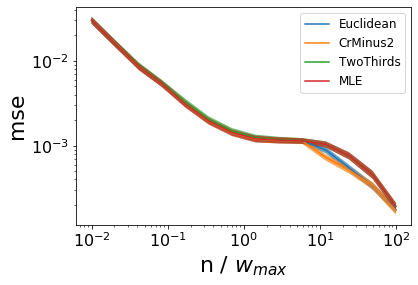

In [5]:
%matplotlib inline

class FlassPlot:
    @staticmethod
    def pic(x, y, label):
        import matplotlib.pyplot as plt
        
        plt.loglog(x, y, label=label)
        plt.legend()
        
    @staticmethod
    def forpaper():
        import matplotlib.pyplot as plt

        LEGEND_SIZE = 12
        SMALL_SIZE = 16
        MEDIUM_SIZE = 22
        BIGGER_SIZE = 24

        plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
        plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
        plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
        plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
        plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
        plt.rc('legend', fontsize=LEGEND_SIZE)    # legend fontsize
        plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
        
    @staticmethod
    def axeslabel(xlabel, ylabel):
        import matplotlib.pyplot as plt
        
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        
    @staticmethod
    def title(title):
        import matplotlib.pyplot as plt
        
        plt.title(title)
        
    @staticmethod
    def savefig(filename):
        import matplotlib.pyplot as plt
        
        plt.savefig(filename, bbox_inches='tight')
        
    @staticmethod
    def plt():
        import matplotlib.pyplot as plt
        
        return plt
  
import pickle
allres = pickle.load(open( "epsilongreedy_estimate_euclideanres.p", "rb" ) )

renameit = { }
skip = { 'Almost MLE': 1, 'MinusOneHalf': 1, 'One': 1, 'Lambda Zero': 1, }
FlassPlot.forpaper()
for name, res in allres:
    if name in skip:
        continue
    x = [ x[0] for x in res ]
    y = [ x[1]['mse'] for x in res ]
    ylo = [ x[1]['mse'] - 1.96 * x[1]['msestd'] for x in res ]
    yhi = [ x[1]['mse'] + 1.96 * x[1]['msestd'] for x in res ]
    FlassPlot.plt().loglog([ x[0] for x in res ], [ x[1]['mse'] for x in res ], label=renameit.get(name, name))
    FlassPlot.plt().fill_between(x, ylo, yhi, alpha=0.7)
FlassPlot.plt().legend()

FlassPlot.axeslabel('n / $w_{max}$', 'mse')
#FlassPlot.plt().savefig("epsilongreedy_mse.pdf", bbox_inches='tight')